<a href="https://colab.research.google.com/github/AlirezaAhadipour/Time-Series-Analysis/blob/main/FordA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pf
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the dataset

For description about the dataset, please refer to:

http://www.j-wichard.de/publications/FordPaper.pdf

In [8]:
# FordA Dataset
root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

train_file = root_url + "FordA_TRAIN.tsv"
test_file = root_url + "FordA_TEST.tsv"

train_data = pd.read_csv(train_file, delimiter="\t", header=None)
test_data = pd.read_csv(test_file, delimiter="\t", header=None)

x_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values

x_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

In [10]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,-1,-0.797172,-0.664392,-0.373015,0.040815,0.526936,0.984288,1.353120,1.578108,1.659251,...,1.120756,0.722417,0.362068,0.092083,-0.081268,-0.212573,-0.391456,-0.664392,-1.073796,-1.564343
1,1,0.804855,0.634629,0.373474,0.038343,-0.340988,-0.740860,-1.109667,-1.395357,-1.570192,...,0.386403,0.049213,-0.258138,-0.510583,-0.683647,-0.773817,-0.785255,-0.714885,-0.560443,-0.319086
2,-1,0.727985,0.111284,-0.499124,-1.068629,-1.578351,-1.990534,-2.302031,-2.503403,-2.585211,...,0.394463,0.463685,0.507735,0.517174,0.504588,0.476270,0.438513,0.394463,0.339400,0.255391
3,-1,-0.234439,-0.502157,-0.732488,-0.946128,-1.139739,-1.323336,-1.490243,-1.607077,-1.620430,...,-0.952804,-0.929437,-0.922761,-0.929437,-0.909409,-0.835970,-0.695768,-0.478790,-0.188707,0.119736
4,-1,-0.171328,-0.062285,0.235829,0.710396,1.239969,1.649823,1.876321,1.865535,1.703751,...,0.776188,0.725496,0.697453,0.731967,0.808545,0.839823,0.733046,0.437520,-0.026585,-0.602213


In [43]:
print(f" There are {x_train.shape[0]} examples in the train set and {x_test.shape[0]} in the test set!")

 There are 3601 examples in the train set and 1320 in the test set!


# Visualize the data

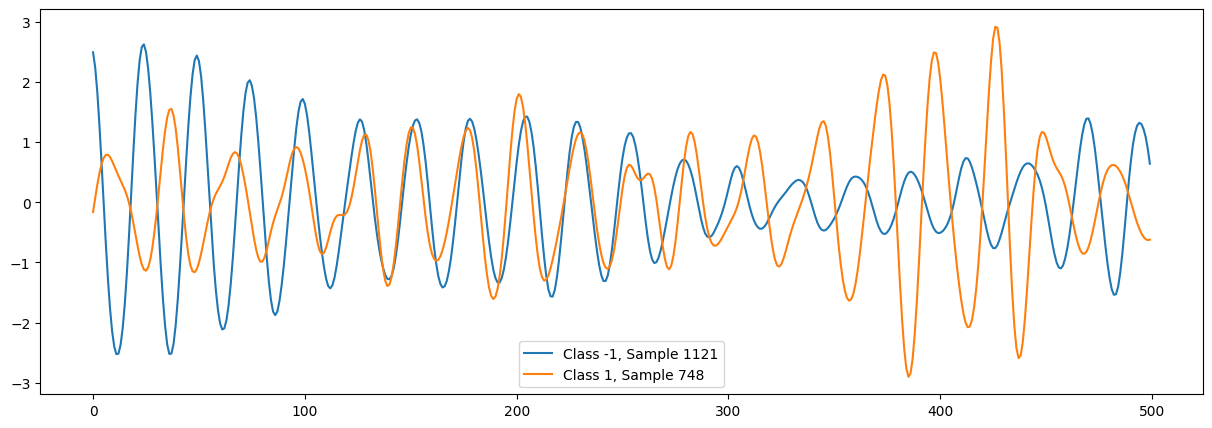

In [23]:
# Plot Samples

classes = np.unique(np.concatenate((y_train, y_test), axis=0))
num_samples_per_class = 1  # Number of samples to plot per class

plt.figure(figsize=(15, 5))
for c in classes:
    c_x_train = x_train[y_train == c]
    sample_indices = np.random.choice(c_x_train.shape[0], size=num_samples_per_class, replace=False)
    for idx in sample_indices:
        plt.plot(c_x_train[idx], label="Class " + str(c) + ", Sample " + str(idx))

plt.legend(loc="best")
plt.show()

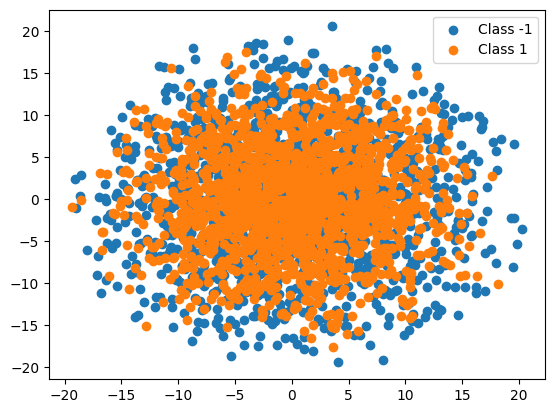

In [24]:
# Dimentionality reduction visualization

from sklearn.decomposition import PCA

# Perform PCA to reduce dimensionality to 2
pca = PCA(n_components=2)
x_train_reduced = pca.fit_transform(x_train)

classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for c in classes:
    class_indices = np.where(y_train == c)
    plt.scatter(x_train_reduced[class_indices, 0], x_train_reduced[class_indices, 1], label="Class " + str(c))

plt.legend(loc="best")
plt.show()

# Mean and Variance

In [45]:
# Select a couple of samples from the dataset
sample_indices = [0, 100, 1000]  # Example indices of the samples
selected_samples = x_train[sample_indices]

# Calculate mean and standard deviation
mean_values = np.mean(selected_samples, axis=1)
std_values = np.std(selected_samples, axis=1)

# Print the calculated statistics
for i, index in enumerate(sample_indices):
    print(f"Sample {index}: Mean={round(mean_values[i], 2)}, Standard Deviation={round(std_values[i], 2)}")


Sample 0: Mean=-0.0, Standard Deviation=1.0
Sample 100: Mean=0.0, Standard Deviation=1.0
Sample 1000: Mean=-0.0, Standard Deviation=1.0


In [33]:
mean_value = round(np.mean(x_train), 2)
std_value = round(np.std(x_train), 2)

print(f"Mean of x_train: {mean_value}")
print(f"Standard Deviation of x_train: {std_value}")

Mean of x_train: -0.0
Standard Deviation of x_train: 1.0


So, all the samples have a mean of 0 and a standard deviation of 1; that is, the dataset is z-score normalized.